In [954]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [955]:
celeb20_img_id_list = ['ariana', 'beyonce', 'bruce', 'cristiano', 'ellen', 'emma', 'george', 'jackie', 'james',
                       'johnny', 'justin', 'kate', 'leonardo', 'lucy', 'morgan', 'oprah', 'rihanna', 'shah', 'shirley',
                       'taylor']
myfriends_img_id_list = ['chengyu', 'kiat', 'qian', 'yuexin']

dataset_name2id = {'celeb20': celeb20_img_id_list, 'myfriends': myfriends_img_id_list}

In [956]:
def cal_average(dataset, csv_path):
    result_df = pd.read_csv('result/result.csv')
    img_id_li = dataset_name2id[dataset]

    result_dic = dict()
    # csv_path = f'result/{dataset}.csv'
    for defense in ['_adavoc', '_ape', '_bf', '_bf_gn',  '_gn', '_gn_bf', '_diffpure','_pdmpure', '']:
        result_dic['defense'] = 'No' if defense == '' else defense[1:]
        
        if os.path.exists(csv_path):
            df_old = pd.read_csv(csv_path)
            # if already calculated before, then skip
            if result_dic['defense'] in df_old['defense'].values:
                continue

        for attack in ['aspl', 'glaze', 'metacloak', 'mist']:
            for metric in ['ism', 'fdr']:
                v_li = []
                for img_id in img_id_li:
                    # print(f'{img_id}_{attack}{defense}')
                    var = result_df[(result_df['img'] == f'{img_id}_{attack}{defense}')][metric].values[0]
                    v_li.append(float(var))
                result_dic[f'{attack}_{metric}'] = '%.4f' % np.average(v_li)
        
        result_dic['average'] = np.average([float(i) for i in list(result_dic.values())[1:]])
        df = pd.DataFrame(result_dic, index=[0])
        
        # csv_path = f'result/result_celeb20_finetune_input_avg.csv'
        if not os.path.exists(csv_path):
            df.to_csv(csv_path, index=False)
        else:
            df.to_csv(csv_path, index=False, mode='a', header=False)


In [957]:
cal_average("celeb20", 'result/celeb20.csv')
df = pd.read_csv('result/celeb20.csv')
df

,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,0.4505,0.7781,0.4876,0.8625,0.3547,0.5594,0.4415,0.8156,0.593738
1,ape,0.5096,0.8344,0.5632,0.9094,0.5113,0.7406,0.4949,0.8875,0.671626
2,bf,0.5455,0.6781,0.6599,0.9094,0.5493,0.6156,0.5224,0.9187,0.674503
3,bf_gn,0.6765,0.9187,0.6772,0.9156,0.6103,0.9187,0.6391,0.9375,0.774234
4,gn,0.6571,0.9531,0.6964,0.9656,0.5973,0.9313,0.5570,0.8906,0.780293
5,gn_bf,0.6628,0.8938,0.6818,0.8969,0.5995,0.8031,0.5894,0.9219,0.758833
6,diffpure,0.1413,0.8375,0.1427,0.8781,0.1641,0.8688,0.1618,0.8406,0.532637
7,pdmpure,0.5618,0.8812,0.5835,0.8812,0.5664,0.8594,0.5916,0.8719,0.703293
8,No,0.5209,0.6813,0.6343,0.9406,0.5434,0.6375,0.2424,0.6156,0.613255


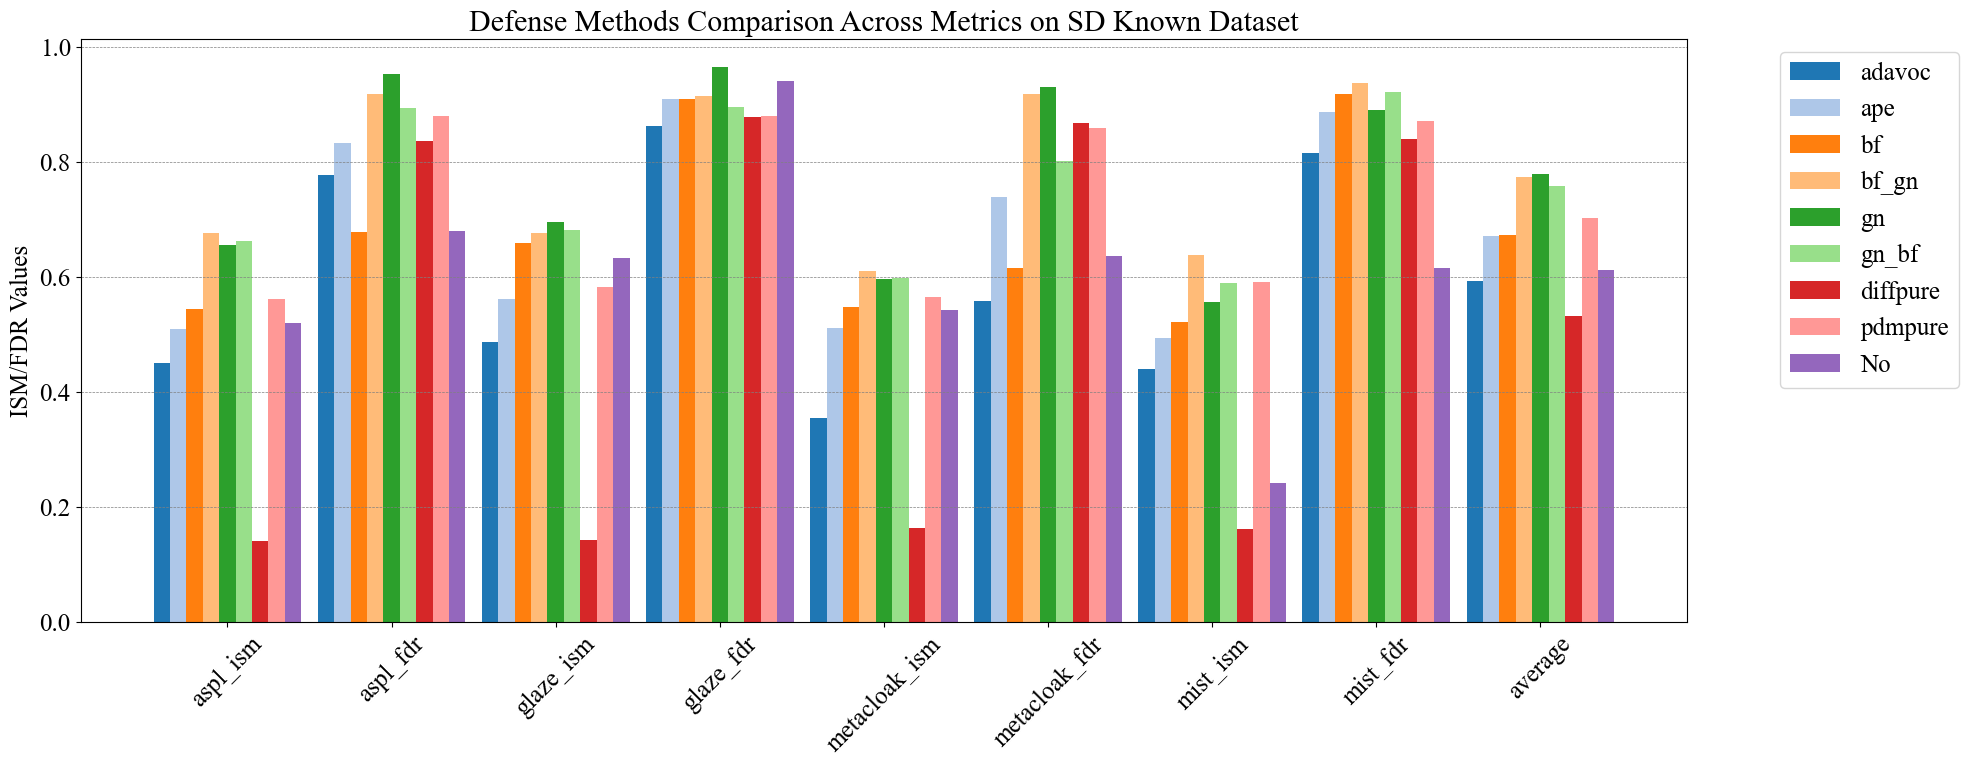

In [958]:
# set font family
plt.rcParams["font.family"] = "Times New Roman"

# set color map
from matplotlib import cm

# Access Dark2 colors
dark2_colors = cm.tab20.colors  # List of RGB tuples


# 设置全局字体大小
plt.rcParams.update({'font.size': 18})

# 数据转置
df_transposed = df.set_index("defense").T
categories = df_transposed.index  # 转置后的指标
defenses = df["defense"]  # 原来的防御方法

# 设置绘图参数
x = np.arange(len(categories))  # 横坐标位置
width = 0.1  # 每个柱状条的宽度

# 创建图表
fig, ax = plt.subplots(figsize=(20, 8))

# 绘制每一组数据
for i, defense in enumerate(defenses):
    ax.bar(x + i * width, df_transposed[defense], width, label=defense, color=dark2_colors[i])

# 设置标题和标签
ax.set_ylabel("ISM/FDR Values")
ax.set_title("Defense Methods Comparison Across Metrics on SD Known Dataset")
ax.set_xticks(x + width * (len(defenses) - 1) / 2)
ax.set_xticklabels(categories, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)



# 调整布局并显示
plt.tight_layout()
plt.show()

In [959]:
# # 将所有数值列转换为浮点数
# for col in df.columns[1:]:
#     df[col] = df[col].astype(np.float64)

# 提取 "None" 行的值作为基准
none_row = df[df["defense"] == "No"].iloc[0, 1:]  # 获取 "None" 行的所有数值列
# none_row
# 
# # 计算每行减去 "None" 行后的值
adjusted_df = df[df["defense"] != "No"].copy()  # 排除 "None" 行
adjusted_df.iloc[:, 1:] = adjusted_df.iloc[:, 1:].astype(float) - none_row.values.astype(float)  # 数值列相减

adjusted_df['average'] = adjusted_df.iloc[:, 1:-1].mean(axis=1)

# # 输出结果
adjusted_df


,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,-0.0704,0.0968,-0.1467,-0.0781,-0.1887,-0.0781,0.1991,0.2000,-0.008262
1,ape,-0.0113,0.1531,-0.0711,-0.0312,-0.0321,0.1031,0.2525,0.2719,0.079363
2,bf,0.0246,-0.0032,0.0256,-0.0312,0.0059,-0.0219,0.2800,0.3031,0.072862
3,bf_gn,0.1556,0.2374,0.0429,-0.0250,0.0669,0.2812,0.3967,0.3219,0.184700
4,gn,0.1362,0.2718,0.0621,0.0250,0.0539,0.2938,0.3146,0.2750,0.179050
5,gn_bf,0.1419,0.2125,0.0475,-0.0437,0.0561,0.1656,0.3470,0.3063,0.154150
6,diffpure,-0.3796,0.1562,-0.4916,-0.0625,-0.3793,0.2313,-0.0806,0.2250,-0.097638
7,pdmpure,0.0409,0.1999,-0.0508,-0.0594,0.0230,0.2219,0.3492,0.2563,0.122625


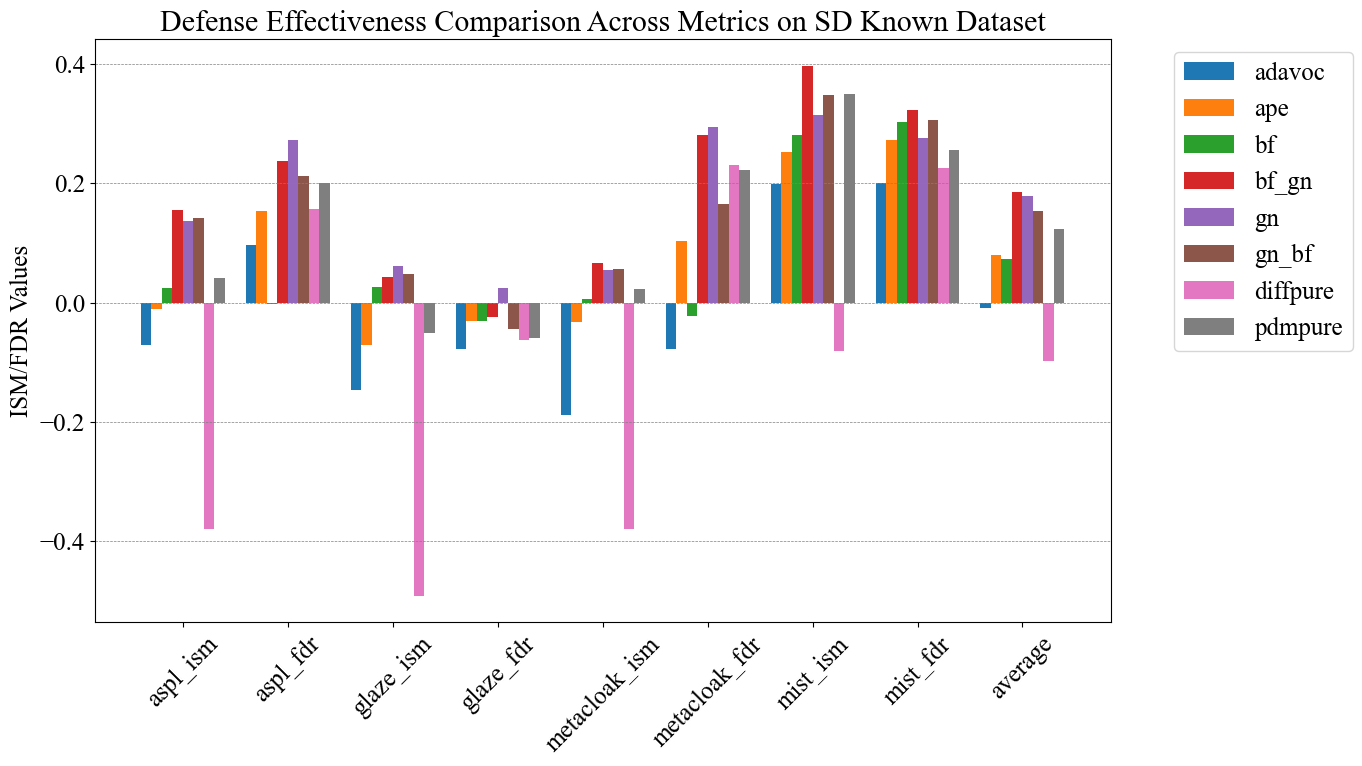

In [960]:
# 数据转置
df = adjusted_df
df_transposed_known = df.set_index("defense").T
categories = df_transposed_known.index  # 转置后的指标
defenses = df["defense"]  # 原来的防御方法

# 设置绘图参数
x = np.arange(len(categories))  # 横坐标位置
width = 0.1  # 每个柱状条的宽度

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每一组数据
for i, defense in enumerate(defenses):
    ax.bar(x + i * width, df_transposed_known[defense], width, label=defense)

# 设置标题和标签
# ax.set_xlabel("Metrics")
ax.set_ylabel("ISM/FDR Values")
ax.set_title("Defense Effectiveness Comparison Across Metrics on SD Known Dataset")
ax.set_xticks(x + width * (len(defenses) - 1) / 2)
ax.set_xticklabels(categories, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 调整布局并显示
plt.tight_layout()
plt.show()

In [961]:
cal_average("myfriends", "result/myfriends4.csv")
df = pd.read_csv('result/myfriends4.csv')
df

,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,0.4138,0.9531,0.4356,0.9688,0.3235,0.8906,0.3939,0.9844,0.670462
1,ape,0.4939,0.8906,0.5694,0.9844,0.4119,0.8438,0.4446,0.7812,0.676696
2,bf,0.5716,0.9688,0.6522,0.9844,0.5667,0.9375,0.5236,1.0000,0.764611
3,bf_gn,0.6818,1.0000,0.7161,0.9697,0.6088,0.9844,0.5491,0.9853,0.806646
4,gn,0.6453,0.9844,0.6855,1.0000,0.5272,0.9062,0.4581,1.0000,0.779261
5,gn_bf,0.5686,0.9844,0.6672,0.9697,0.5510,0.9062,0.5069,1.0000,0.770362
6,diffpure,0.1680,0.9844,0.1420,0.9219,0.1586,0.9375,0.1538,1.0000,0.581840
7,pdmpure,0.5555,1.0000,0.5741,0.9844,0.5564,1.0000,0.5297,0.9844,0.751816
8,No,0.5999,0.9688,0.5694,0.9844,0.5047,0.7969,0.2226,0.6719,0.674491


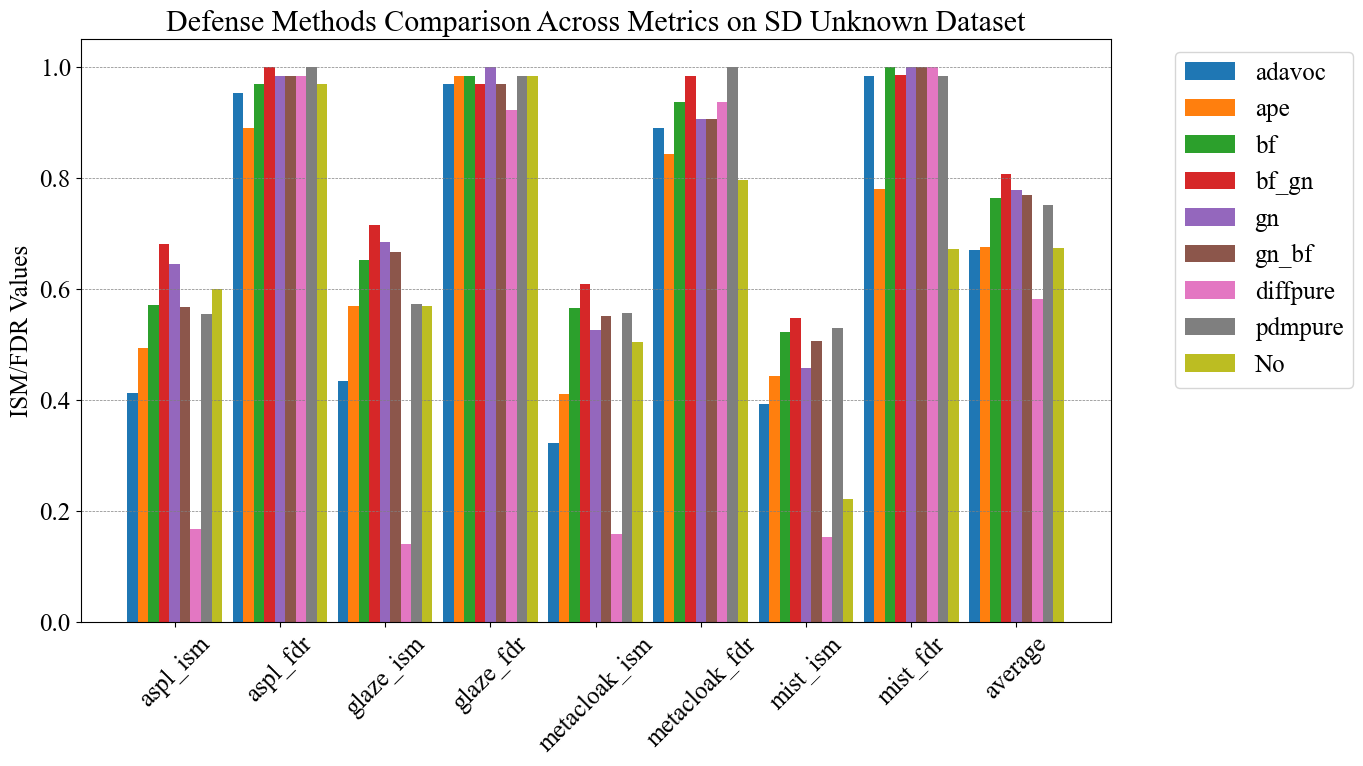

In [962]:
# 设置全局字体大小
plt.rcParams.update({'font.size': 18})

# 数据转置
df_transposed = df.set_index("defense").T
categories = df_transposed.index  # 转置后的指标
defenses = df["defense"]  # 原来的防御方法

# 设置绘图参数
x = np.arange(len(categories))  # 横坐标位置
width = 0.1  # 每个柱状条的宽度

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每一组数据
for i, defense in enumerate(defenses):
    ax.bar(x + i * width, df_transposed[defense], width, label=defense)

# 设置标题和标签
# ax.set_xlabel("Metrics")
ax.set_ylabel("ISM/FDR Values")
ax.set_title("Defense Methods Comparison Across Metrics on SD Unknown Dataset")
ax.set_xticks(x + width * (len(defenses) - 1) / 2)
ax.set_xticklabels(categories, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 调整布局并显示
plt.tight_layout()
plt.show()

In [963]:
# # 将所有数值列转换为浮点数
# for col in df.columns[1:]:
#     df[col] = df[col].astype(np.float64)

# 提取 "None" 行的值作为基准
none_row = df[df["defense"] == "No"].iloc[0, 1:]  # 获取 "None" 行的所有数值列
# none_row
# 
# # 计算每行减去 "None" 行后的值
adjusted_df = df[df["defense"] != "No"].copy()  # 排除 "None" 行
adjusted_df.iloc[:, 1:] = adjusted_df.iloc[:, 1:].astype(float) - none_row.values.astype(float)  # 数值列相减

adjusted_df['average'] = adjusted_df.iloc[:, 1:-1].mean(axis=1)

# # 输出结果
adjusted_df


,defense,aspl_ism,aspl_fdr,glaze_ism,glaze_fdr,metacloak_ism,metacloak_fdr,mist_ism,mist_fdr,average
0,adavoc,-0.1861,-0.0157,-0.1338,-0.0156,-0.1812,0.0937,0.1713,0.3125,0.005637
1,ape,-0.1060,-0.0782,0.0000,0.0000,-0.0928,0.0469,0.2220,0.1093,0.012650
2,bf,-0.0283,0.0000,0.0828,0.0000,0.0620,0.1406,0.3010,0.3281,0.110775
3,bf_gn,0.0819,0.0312,0.1467,-0.0147,0.1041,0.1875,0.3265,0.3134,0.147075
4,gn,0.0454,0.0156,0.1161,0.0156,0.0225,0.1093,0.2355,0.3281,0.111012
5,gn_bf,-0.0313,0.0156,0.0978,-0.0147,0.0463,0.1093,0.2843,0.3281,0.104425
6,diffpure,-0.4319,0.0156,-0.4274,-0.0625,-0.3461,0.1406,-0.0688,0.3281,-0.106550
7,pdmpure,-0.0444,0.0312,0.0047,0.0000,0.0517,0.2031,0.3071,0.3125,0.108237


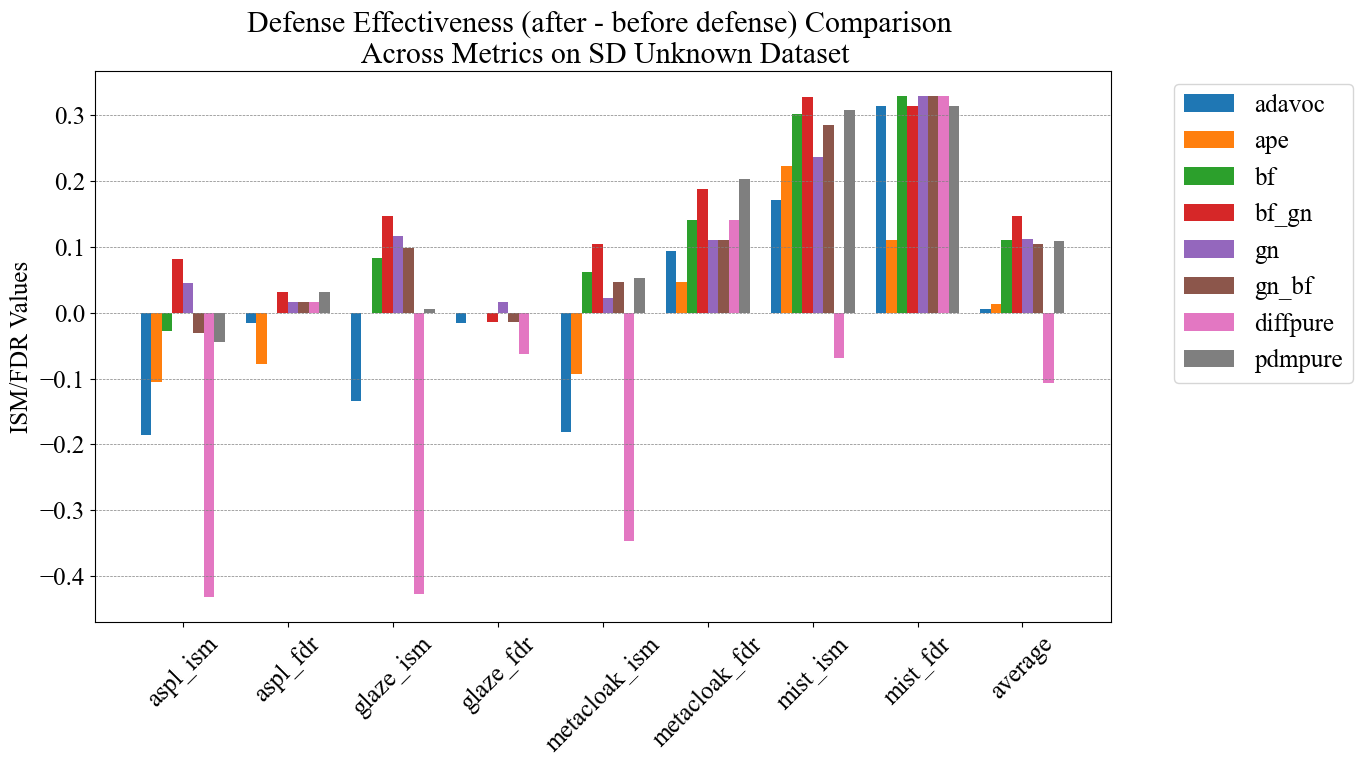

In [964]:
# 数据转置
df = adjusted_df
df_transposed_unknown = df.set_index("defense").T
categories = df_transposed_unknown.index  # 转置后的指标
defenses = df["defense"]  # 原来的防御方法

# 设置绘图参数
x = np.arange(len(categories))  # 横坐标位置
width = 0.1  # 每个柱状条的宽度

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每一组数据
for i, defense in enumerate(defenses):
    ax.bar(x + i * width, df_transposed_unknown[defense], width, label=defense)

# 设置标题和标签
# ax.set_xlabel("Metrics")
ax.set_ylabel("ISM/FDR Values")
ax.set_title("Defense Effectiveness (after - before defense) Comparison \n Across Metrics on SD Unknown Dataset")
ax.set_xticks(x + width * (len(defenses) - 1) / 2)
ax.set_xticklabels(categories, rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 调整布局并显示
plt.tight_layout()
plt.show()

In [965]:
df_transposed_unknown

defense,adavoc,ape,bf,bf_gn,gn,gn_bf,diffpure,pdmpure
aspl_ism,-0.186100,-0.10600,-0.028300,0.081900,0.045400,-0.031300,-0.43190,-0.044400
aspl_fdr,-0.015700,-0.07820,0.000000,0.031200,0.015600,0.015600,0.01560,0.031200
glaze_ism,-0.133800,0.00000,0.082800,0.146700,0.116100,0.097800,-0.42740,0.004700
glaze_fdr,-0.015600,0.00000,0.000000,-0.014700,0.015600,-0.014700,-0.06250,0.000000
metacloak_ism,-0.181200,-0.09280,0.062000,0.104100,0.022500,0.046300,-0.34610,0.051700
metacloak_fdr,0.093700,0.04690,0.140600,0.187500,0.109300,0.109300,0.14060,0.203100
mist_ism,0.171300,0.22200,0.301000,0.326500,0.235500,0.284300,-0.06880,0.307100
mist_fdr,0.312500,0.10930,0.328100,0.313400,0.328100,0.328100,0.32810,0.312500
average,0.005637,0.01265,0.110775,0.147075,0.111012,0.104425,-0.10655,0.108237


In [966]:
df_combine = pd.DataFrame({
    'defense': df_transposed_unknown.loc["average"].keys(),
    'SD unknown average': df_transposed_unknown.loc["average"].values,
    'SD known average': df_transposed_known.loc["average"].values,
})

new_row = {'defense': 'average', 'SD unknown average': np.average(df_transposed_unknown.loc["average"].values), 'SD known average': np.average(df_transposed_known.loc["average"].values)}
df_combine = pd.concat([df_combine, pd.DataFrame([new_row])], ignore_index=True)

In [967]:
df_combine

,defense,SD unknown average,SD known average
0,adavoc,0.005637,-0.008262
1,ape,0.012650,0.079363
2,bf,0.110775,0.072862
3,bf_gn,0.147075,0.184700
4,gn,0.111012,0.179050
5,gn_bf,0.104425,0.154150
6,diffpure,-0.106550,-0.097638
7,pdmpure,0.108237,0.122625
8,average,0.061658,0.085856


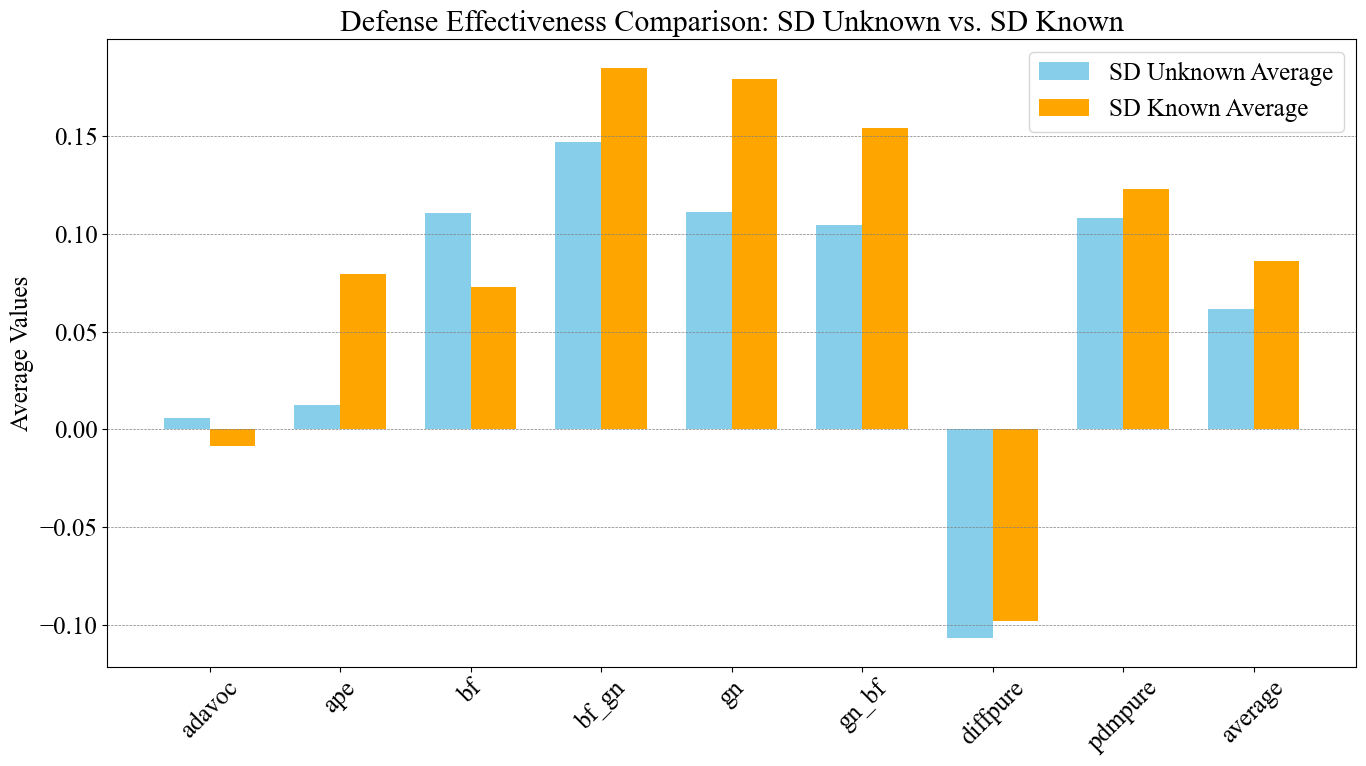

In [968]:
df = df_combine

# Set up parameters for plotting
x = np.arange(len(df['defense']))  # X positions for each defense
width = 0.35  # Bar width

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
bars1 = ax.bar(x - width / 2, df['SD unknown average'], width, label='SD Unknown Average', color='skyblue')
bars2 = ax.bar(x + width / 2, df['SD known average'], width, label='SD Known Average', color='orange')

# Add labels, title, and custom ticks
ax.set_ylabel("Average Values")
ax.set_title("Defense Effectiveness Comparison: SD Unknown vs. SD Known")
ax.set_xticks(x)
ax.set_xticklabels(df['defense'], rotation=45)
ax.legend()

# Add grid lines
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [969]:
df_transposed_unknown

defense,adavoc,ape,bf,bf_gn,gn,gn_bf,diffpure,pdmpure
aspl_ism,-0.186100,-0.10600,-0.028300,0.081900,0.045400,-0.031300,-0.43190,-0.044400
aspl_fdr,-0.015700,-0.07820,0.000000,0.031200,0.015600,0.015600,0.01560,0.031200
glaze_ism,-0.133800,0.00000,0.082800,0.146700,0.116100,0.097800,-0.42740,0.004700
glaze_fdr,-0.015600,0.00000,0.000000,-0.014700,0.015600,-0.014700,-0.06250,0.000000
metacloak_ism,-0.181200,-0.09280,0.062000,0.104100,0.022500,0.046300,-0.34610,0.051700
metacloak_fdr,0.093700,0.04690,0.140600,0.187500,0.109300,0.109300,0.14060,0.203100
mist_ism,0.171300,0.22200,0.301000,0.326500,0.235500,0.284300,-0.06880,0.307100
mist_fdr,0.312500,0.10930,0.328100,0.313400,0.328100,0.328100,0.32810,0.312500
average,0.005637,0.01265,0.110775,0.147075,0.111012,0.104425,-0.10655,0.108237


In [970]:
df_combine = pd.DataFrame({
    'defense': df_transposed_unknown.index,
    'SD unknown bf': df_transposed_unknown["bf"].values,
    'SD known bf': df_transposed_known["bf"].values,
})

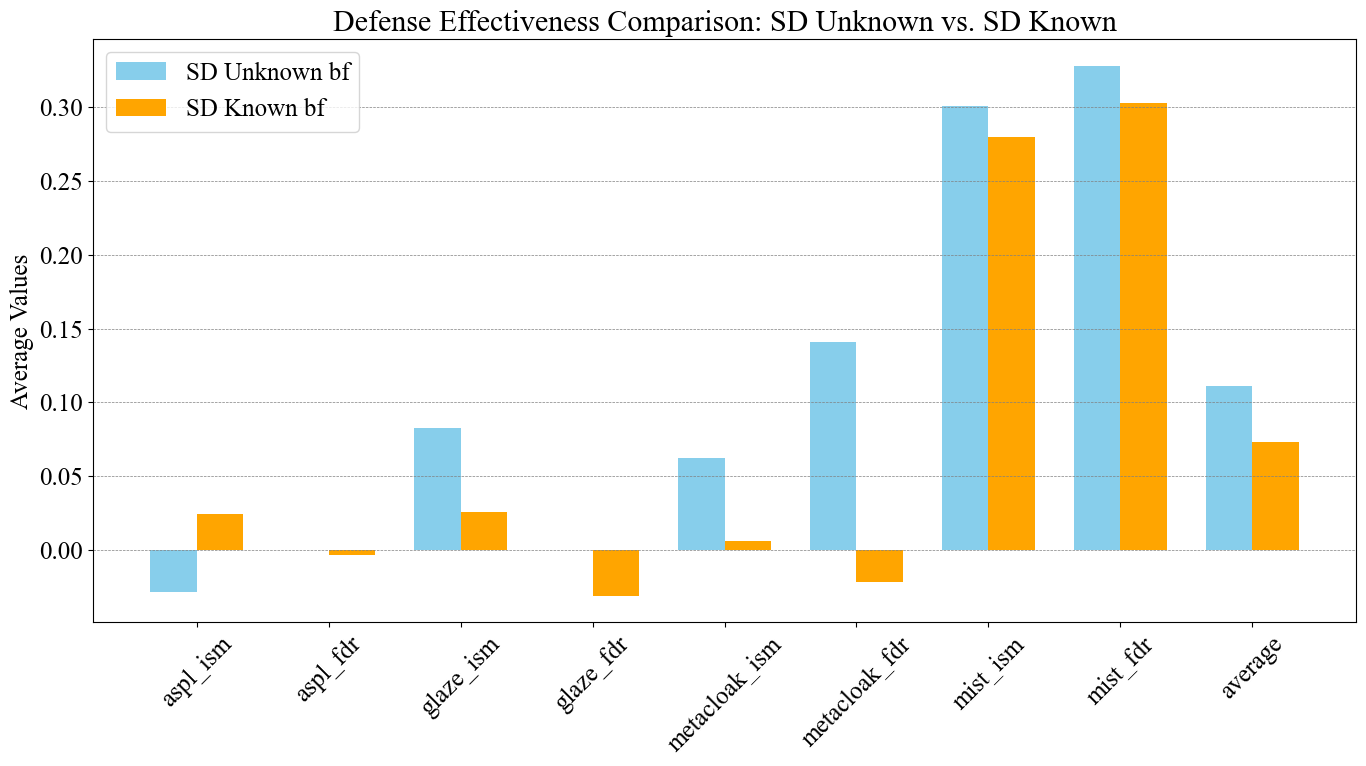

In [971]:
df = df_combine

# Set up parameters for plotting
x = np.arange(len(df['defense']))  # X positions for each defense
width = 0.35  # Bar width

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
bars1 = ax.bar(x - width / 2, df['SD unknown bf'], width, label='SD Unknown bf', color='skyblue')
bars2 = ax.bar(x + width / 2, df['SD known bf'], width, label='SD Known bf', color='orange')

# Add labels, title, and custom ticks
ax.set_ylabel("Average Values")
ax.set_title("Defense Effectiveness Comparison: SD Unknown vs. SD Known")
ax.set_xticks(x)
ax.set_xticklabels(df['defense'], rotation=45)
ax.legend()

# Add grid lines
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [972]:
df_combine = pd.DataFrame({
    'defense': df_transposed_unknown.index,
    'SD unknown bf_gn': df_transposed_unknown["bf_gn"].values,
    'SD known bf_gn': df_transposed_known["bf_gn"].values,
})

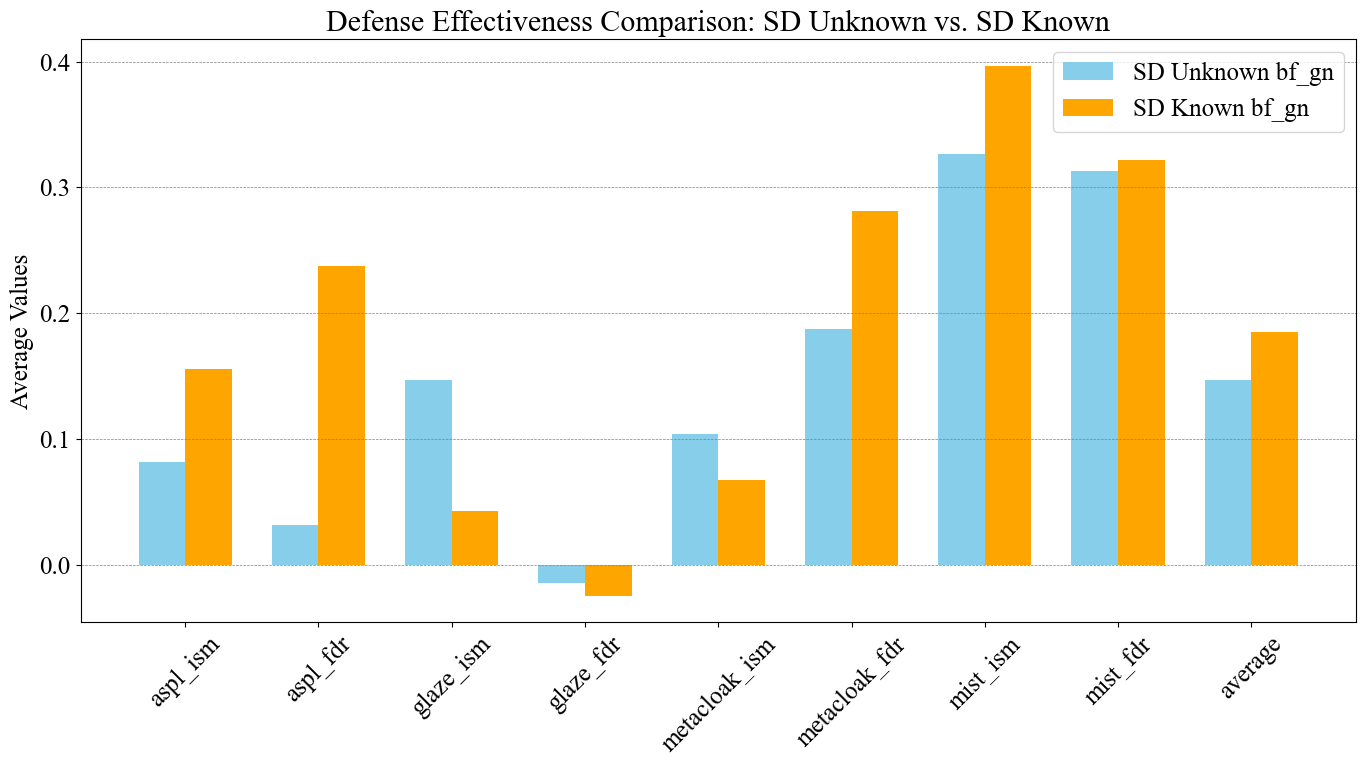

In [973]:
df = df_combine

# Set up parameters for plotting
x = np.arange(len(df['defense']))  # X positions for each defense
width = 0.35  # Bar width

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
bars1 = ax.bar(x - width / 2, df['SD unknown bf_gn'], width, label='SD Unknown bf_gn', color='skyblue')
bars2 = ax.bar(x + width / 2, df['SD known bf_gn'], width, label='SD Known bf_gn', color='orange')

# Add labels, title, and custom ticks
ax.set_ylabel("Average Values")
ax.set_title("Defense Effectiveness Comparison: SD Unknown vs. SD Known")
ax.set_xticks(x)
ax.set_xticklabels(df['defense'], rotation=45)
ax.legend()

# Add grid lines
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Adjust layout and display
plt.tight_layout()
plt.show()
